# Importation des librairies à utiliser

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Chargement des données

In [2]:
df = pd.read_csv('Churn.csv')

# Exploration des données

### Afficher les noms des features

In [3]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

### Pour afficher le nombre de lignes (observations) et de colonnes(descripteurs)

In [4]:
df.shape

(3333, 21)

###  head() affiche les 5 premières lignes.

In [5]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### tail() affiche les 5 dérnieres lignes. 

In [6]:
df.tail()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


### Afficher des informations sur le Dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

##### Le feature 'Phone' est unique donc il est inutile pour la prédiction de la variable cible. Donc on peut le supprimer de notre Dataframe.

In [8]:
df=df.drop(labels='Phone', axis=1)

In [9]:
df.shape

(3333, 20)

## interpretation de .info():
On remarque qu'il n'y a pas de valeurs nulles dans notre Dataframe car le nombre de valeurs non nulles de chaque feature est égale au nombre de lignes.

On peut valider ça avec la methode .isnull().sum() qui somme le nombre de valeurs nulles:

In [10]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

### Calculer le nombre d'observations pour chaque state.

In [11]:
df.groupby('State').count().loc[:,:'Account Length']

,Account Length
State,
AK,52
AL,80
AR,55
AZ,64
CA,34
CO,66
CT,74
DC,54
DE,61


### Afficher les types de chaque feature

In [12]:
df.dtypes

State              object
Account Length      int64
Area Code           int64
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

### Afficher un résumé des statistiques descriptives

In [13]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Vérifier s'il y a une valeur redandante

In [14]:
df.duplicated().any()

False

Aprés l'observation du résumé des statistiques descriptives on remarque qu'il n'y a pas de valeurs (min,max,etc..) illogiques.

### Matrice de corrélation
##### On peut afficher la matrice de corrélation pour determiner les variables corrélées dans le but de visualizer les relations entre elles.

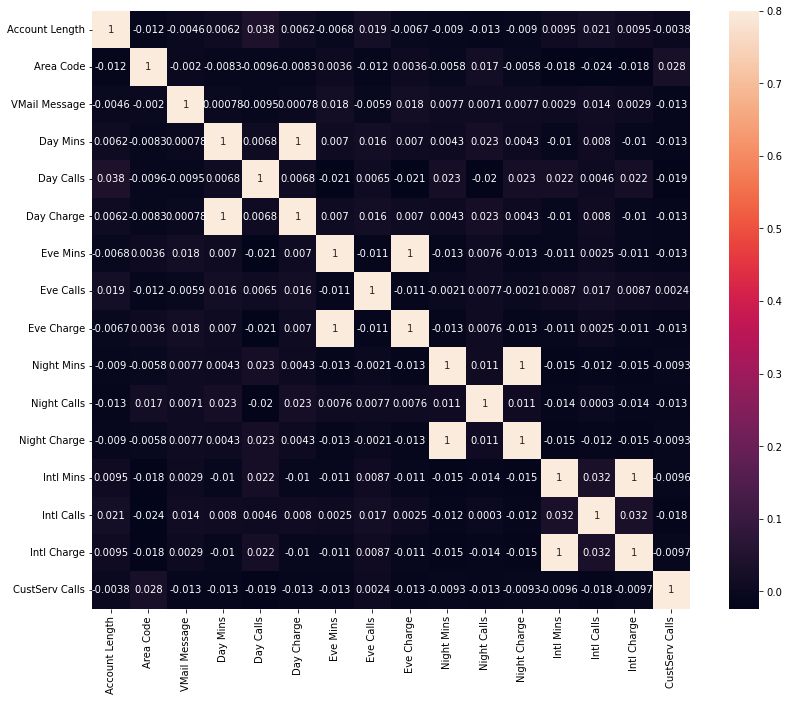

In [15]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

#### On remarque que (Day mins, Day Charge) , (Eve Mins, Eve Charge) , (Night Mins, Night Charge) et (Intl Charge, Intl Mins) sont fortement corrélées deux à deux. 
#### On peut visualizer les relations entre eux avec les courbes ci-dessous qui représente chaqu'un de ces 8 features en fonction des autres.

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


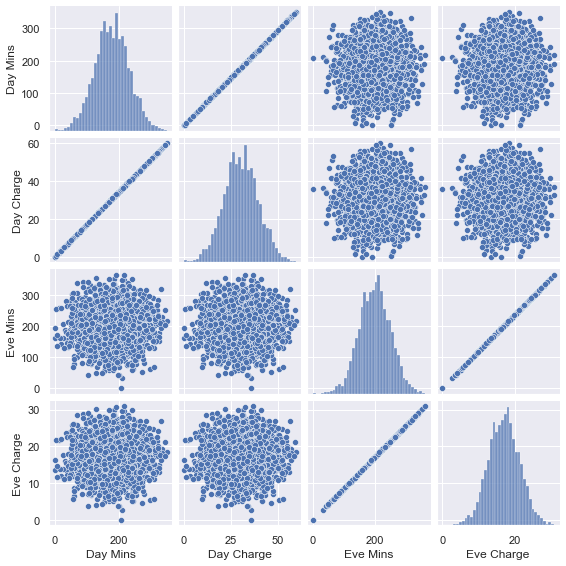

In [16]:
sns.set()
cols = ['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge']
sns.pairplot(df[cols], size = 2)
plt.show();

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


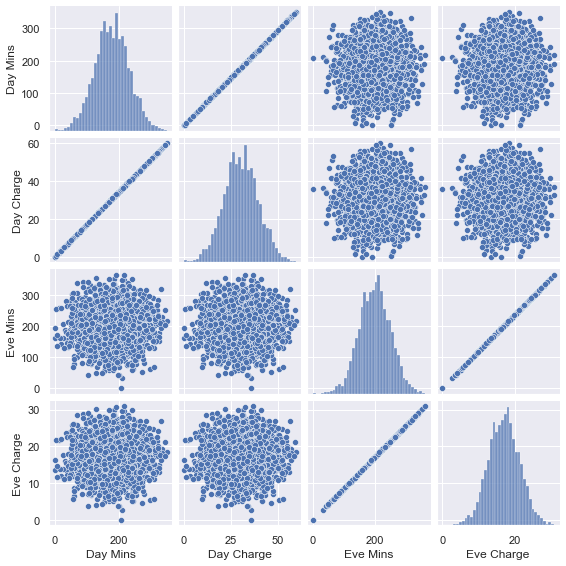

In [17]:
sns.set()
cols1 = ['Night Mins', 'Night Charge', 'Intl Charge','Intl Mins']
sns.pairplot(df[cols], size = 2)
plt.show();

In [18]:
print(df['Night Mins'].corr(df['Night Charge']))
print(df['Eve Mins'].corr(df['Eve Charge']))
print(df['Day Mins'].corr(df['Day Charge']))
print(df['Intl Mins'].corr(df['Intl Charge']))

0.9999992148758772
0.9999997760198502
0.9999999521903995
0.9999927417510324


In [19]:
df=df.drop(["Day Mins"],axis=1)
df=df.drop(["Eve Mins"],axis=1)
df=df.drop(["Night Mins"],axis=1)
df=df.drop(["Intl Mins"],axis=1)

#### On remarque qu'il y a une relation linéaire entre chaque couple (Day mins, Day Charge) , (Eve Mins, Eve Charge) , (Night Mins, Night Charge) et (Intl Charge, Intl Mins). On doit donc supprimer l'un des variables de chaque couple.

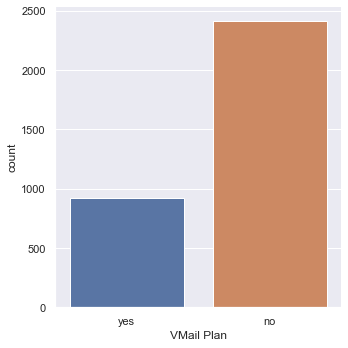

In [20]:
sns.catplot(x='VMail Plan',data=df,kind="count")

On remarque que la plupart du nombre de personnes qui ont la fonctionnalité de messagerie vocale n'ont pas changé d'opérateurs (Churn est True).


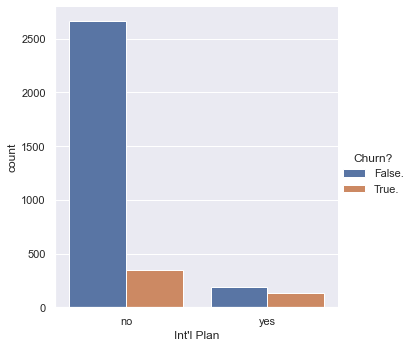

In [21]:
sns.catplot(x='Int\'l Plan',hue='Churn?',data=df,kind="count")

Une grande partie des personnes qui ont la fonctionnalité du plan internationale ont changé d'opérateurs.

### Visualizons l'effet de quelques features sur le Churn (Variable cible).

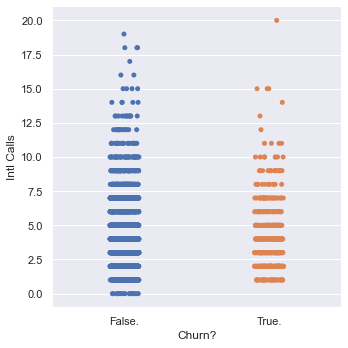

In [22]:
sns.catplot(data=df, x="Churn?", y="Intl Calls")

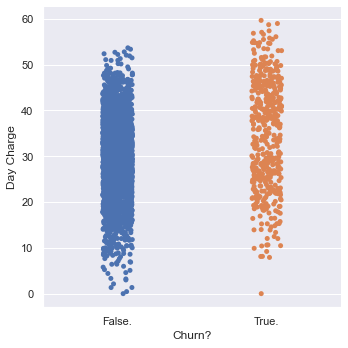

In [23]:
sns.catplot(data=df, x="Churn?", y="Day Charge")

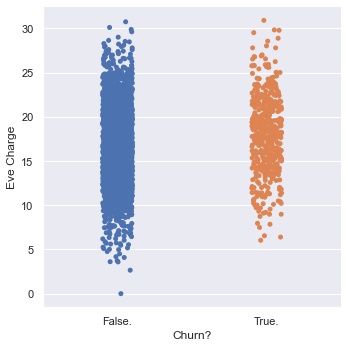

In [24]:
sns.catplot(data=df, x="Churn?", y="Eve Charge")

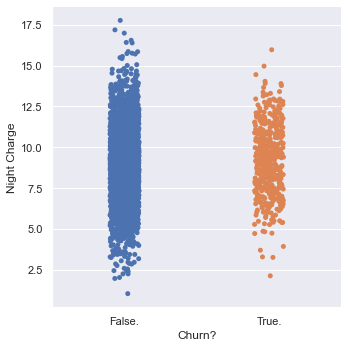

In [25]:
sns.catplot(data=df, x="Churn?", y="Night Charge")

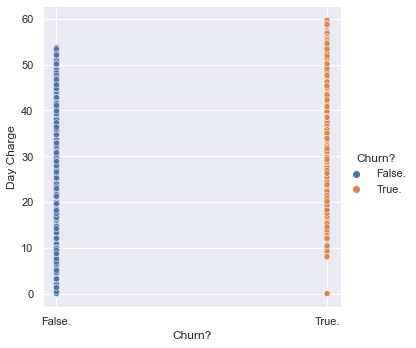

In [26]:
sns.relplot(x = 'Churn?', y = 'Day Charge', hue='Churn?',data = df)

#### On peut considérer le point qui a pour Day Charge presque nulle comme une donnée abérantes car tous les autres points ont une valeur de Day Charge > 8.

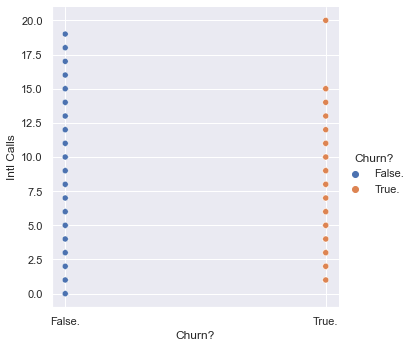

In [27]:
sns.relplot(x = 'Churn?', y = 'Intl Calls', hue='Churn?',data = df)

#### On peut considérer le point qui a pour Intl Calls égale à 20 comme une donnée abérantes car tous les autres points ont une valeur de Intl Calls <= 15.













#### On peut aussi visualizer les courbes des densités de quelques variables et les comparer avec les densités des courbes de la loi normale de paramétres la moyenne et l'écart type de chaque variables.

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


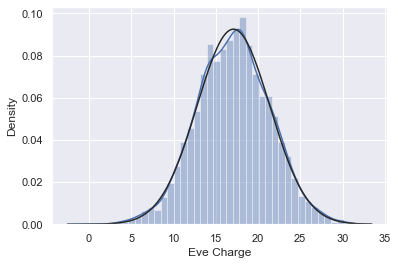

In [28]:
from scipy.stats import norm
sns.distplot(df['Eve Charge'], fit=norm);

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


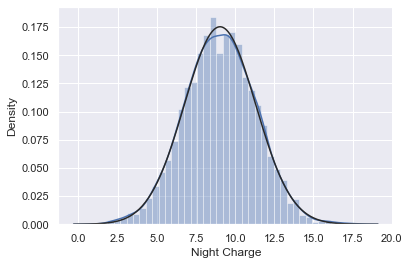

In [29]:
sns.distplot(df['Night Charge'], fit=norm);

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


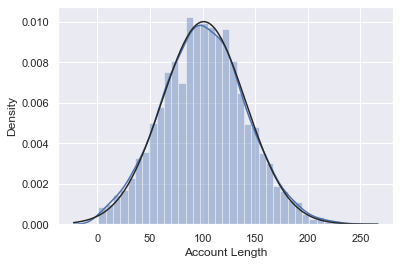

In [30]:
sns.distplot(df['Account Length'], fit=norm);

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


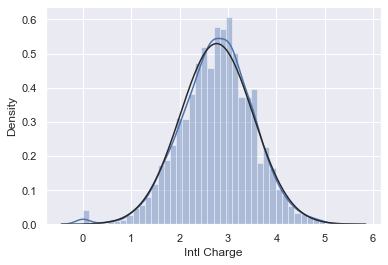

In [31]:
sns.distplot(df['Intl Charge'], fit=norm);

# Préparation des données

## Nettoyage des données

#### On n'a ni de valeurs nulles ni de valeurs manquantes, par contre on a détecté quelques valeurs qui peuvent etre considérées comme abérantes.

In [32]:
df.query("`Day Charge`<8 and `Churn?`=='True.'")

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
1345,SD,98,415,no,no,0,0,0.00,130,13.57,88,7.52,1,1.84,4,True.
1531,DE,138,510,yes,no,0,104,7.91,114,15.81,95,7.54,4,2.59,4,True.


In [33]:
df.query("`Intl Calls`== 20")

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
3291,MI,119,510,yes,yes,22,119,29.26,133,19.01,94,6.75,20,3.75,1,True.


#### Ces exemples sont des vrais outliers car il n'y a pas de valeurs illogiques pour aucune variables donc on n'a rien à supprimer. 

In [34]:
df.shape

(3333, 16)

## Transformation des données

### Conversion de types

#### On change les valeurs des variables 'Int'l Plan', 'VMail Plan' et 'Churn?' en 0 et 1.

In [35]:
df['Int\'l Plan'] = df['Int\'l Plan'].map({'yes': 1, 'no': 0})

In [36]:
df['VMail Plan'] = df['VMail Plan'].map({'yes': 1, 'no': 0})

In [37]:
df['Churn?'] = df['Churn?'].map({'True.': 1, 'False.': 0})

### Encodage avec Dummies

In [38]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [39]:
df

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,110,45.07,99,16.78,91,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,123,27.47,103,16.62,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,114,41.38,110,10.30,104,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,71,50.90,88,5.26,89,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,113,28.34,122,12.61,121,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,77,26.55,126,18.32,83,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0,0,0,57,39.29,55,13.04,123,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0,0,0,109,30.74,58,24.55,91,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,1,0,0,105,36.35,84,13.57,137,...,0,0,0,0,0,0,0,0,0,0


### Mise en échelle

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols=['Account Length','Area Code','VMail Message','Day Calls','Day Charge','Eve Calls','Eve Charge','Night Calls','Night Charge','Intl Calls','Intl Charge']
df[cols] = sc.fit_transform(df[cols])

In [41]:
df

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.676489,-0.523603,0,1,1.234883,0.476643,1.567036,-0.055940,-0.070427,-0.465494,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,-0.523603,0,1,1.307948,1.124503,-0.334013,0.144867,-0.107549,0.147825,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,-0.523603,0,0,-0.591760,0.675985,1.168464,0.496279,-1.573900,0.198935,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,-0.688834,1,0,-0.591760,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,-0.523603,1,0,-0.591760,0.626149,-0.240041,1.098699,-1.037939,1.067803,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.523603,0,1,2.038605,-1.167924,-0.433386,1.299506,0.286880,-0.874374,...,0,0,0,0,0,0,0,0,0,0
3329,-0.830437,-0.523603,0,0,-0.591760,-2.164631,0.942714,-2.264816,-0.938172,1.170023,...,0,0,0,0,0,0,0,0,1,0
3330,-1.835055,1.718817,0,0,-0.591760,0.426808,0.019193,-2.114211,1.732349,-0.465494,...,0,0,0,0,0,0,0,0,0,0
3331,2.082955,1.718817,1,0,-0.591760,0.227466,0.625153,-0.808966,-0.815203,1.885562,...,0,0,0,0,0,0,0,0,0,0


## Feature selection

In [42]:
# diviser les données en 80% training set  et 20% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Churn?"],axis=1), df["Churn?"], test_size=0.2, random_state=22)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=11)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(df.drop(['Churn?'],axis=1).columns[rfe.support_]))
t=list(df.drop(['Churn?'],axis=1).columns[rfe.support_])

Sélection de variables [ True False  True False  True  True  True False  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
Classement de variables [ 1  4  1  3  1  1  1  2  1  1  1  1  1  1 41 21 33 42 20 25 39 49 47 40
 54 52 30 38 19 23 53 48 27 15 22 11 13 46  7  9 29 37 43 24  6 35 28 14
 10 51 12 32 50  8 36 45  5 17 16 26 18 31 44 34]
Variables sélectionnées : ['Account Length', "Int'l Plan", 'VMail Message', 'Day Calls', 'Day Charge', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'CustServ Calls']


In [44]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(2666, 11)
(667, 11)


## SVM

### On a remarqué que notre dataset n'est pas équilibré au niveau des valeurs de la variable cible. (nombre de 0 est largement supérieur au nombre de 1). Et ca a ramené à avoir une valeur de précision trés basse. Par suite on a décidé d'utiliser le 'oversampling' pour équilibrer le dataset.

In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
import imblearn

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
from sklearn.datasets import make_classification

In [49]:

# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train,y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 2283, 1: 2283})


In [50]:
#Entrainer le modèle svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_over, y_over)

SVC()

In [51]:
pip install yellowbrick --user

Note: you may need to restart the kernel to use updated packages.


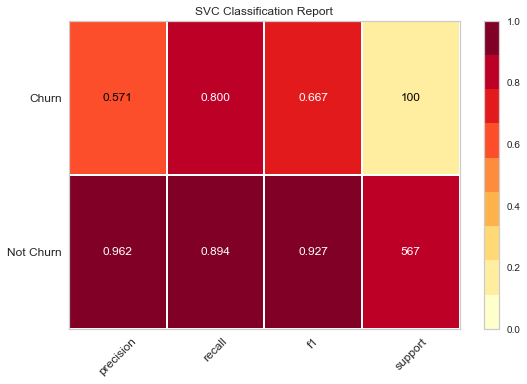

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [52]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not Churn", "Churn"]

visualizer = ClassificationReport(svm, classes=classes, support=True)
visualizer.fit(X_over, y_over) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# Comparaison des résultats

## Tableau comparatif

### SVM avec GridSearchCV

Nous allons faire varier les paramétres C et gamma en plus.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.


C:Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. 

In [53]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [54]:
y_pred_svc_5 = grid.predict(X_test)

In [55]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


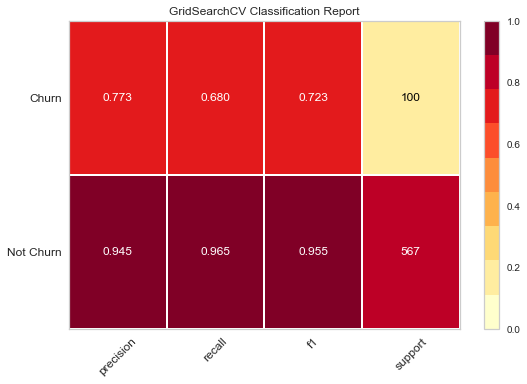

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [56]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not Churn", "Churn"]

visualizer = ClassificationReport(grid, classes=classes, support=True)
visualizer.fit(X_over, y_over) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()     

### KNN

Text(0, 0.5, 'Erreur')

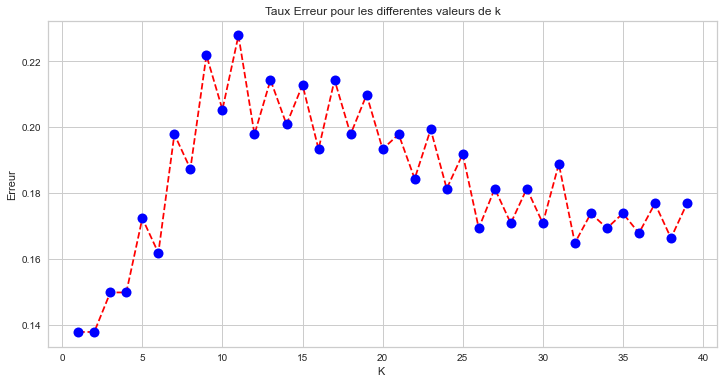

In [57]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_over, y_over)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [58]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(2,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_over, y_over)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 2
Best n_neighbors: 1


In [59]:
# Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 2, 'n_neighbors': 1, 'p': 2}


In [60]:
knn = KNeighborsClassifier(1,p=2,leaf_size=2 )
knn_model = knn.fit(X_over, y_over)
y_pred_knn = knn_model.predict(X_test)

In [61]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_over, y_over)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.86


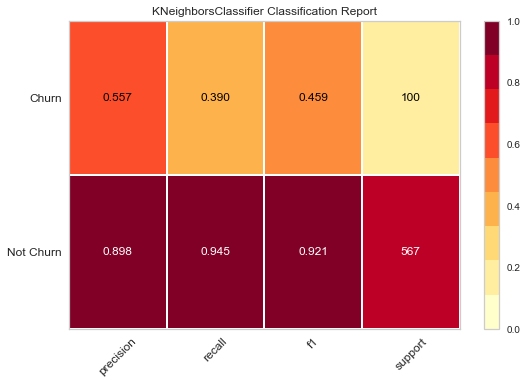

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [62]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not Churn", "Churn"]

visualizer = ClassificationReport(knn, classes=classes, support=True)
visualizer.fit(X_over, y_over) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()   

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#Instanciation du modèle
modele_regLog = LogisticRegression(penalty='none')
# Apprentissage 
modele_regLog.fit(X_over, y_over)
#Prédiction
y_pred=modele_regLog.predict(X_test)

In [64]:
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(modele_regLog.score(X_over, y_over)))
print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(modele_regLog.score(X_test, y_test)))

Accuracy of Logistic Regression on training set: 0.76
Accuracy of Logistic Regression on test set: 0.76


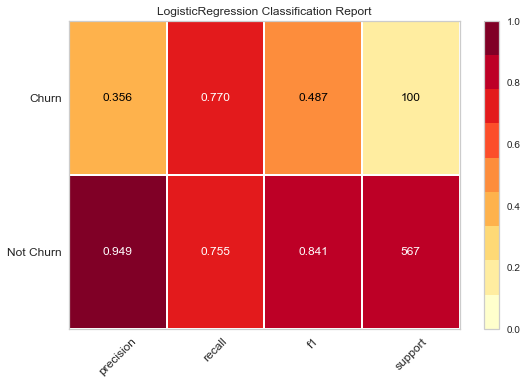

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [65]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Specify the target classes
classes = ["Not Churn", "Churn"]

visualizer = ClassificationReport(modele_regLog, classes=classes, support=True)
visualizer.fit(X_over, y_over) 
visualizer.score(X_test, y_test)    # Evaluate the model on the test data
visualizer.show()   

## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_over, y_over)

DecisionTreeClassifier(random_state=0)

In [68]:
from sklearn.metrics import confusion_matrix
y_pred_dt = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[428 139]
 [ 23  77]]


## Random Forest

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [30,100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_over, y_over)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [70]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 30, max_depth=8, criterion='gini')
rfc1.fit(X_over,y_over)

RandomForestClassifier(max_depth=8, random_state=42)

In [72]:
y_pred_rf = rfc1.predict(X_test)
print(f"Confusion Matrix :- \n{confusion_matrix(y_test,y_pred_rf)}\n")


Confusion Matrix :- 
[[540  27]
 [ 19  81]]



## Adaboost 

In [73]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=100,random_state=100)
abcl = abcl.fit(X_over, y_over)
y_predboost = abcl.predict(X_test)

In [74]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(abcl.score(X_over, y_over)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(abcl.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.87
Accuracy of Random Forest classifier on test set: 0.84


# Comparaison des résultats

## Tableau comparatif

Nous allons maintenant

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_dt)
s2=accuracy_score(y_test, y_predboost)
s3=accuracy_score(y_test, y_pred_rf)
s4=accuracy_score(y_test, y_pred_svc_5)
s5=accuracy_score(y_test, y_pred_knn)
s6=accuracy_score(y_test, y_pred)


models = pd.DataFrame({
    'Model': ['Decision Tree', 'Adaboost','Random Forest',
              'SVM RBF_GRID','KNN','Logistic Regression'],
    'Score': [s1,s2, s3, 
              s4,s5,s6]})
models.sort_values(by="Score",ascending=False)


,Model,Score
0,Decision Tree,0.940030
2,Random Forest,0.931034
3,SVM RBF_GRID,0.922039
4,KNN,0.862069
1,Adaboost,0.844078
5,Logistic Regression,0.757121


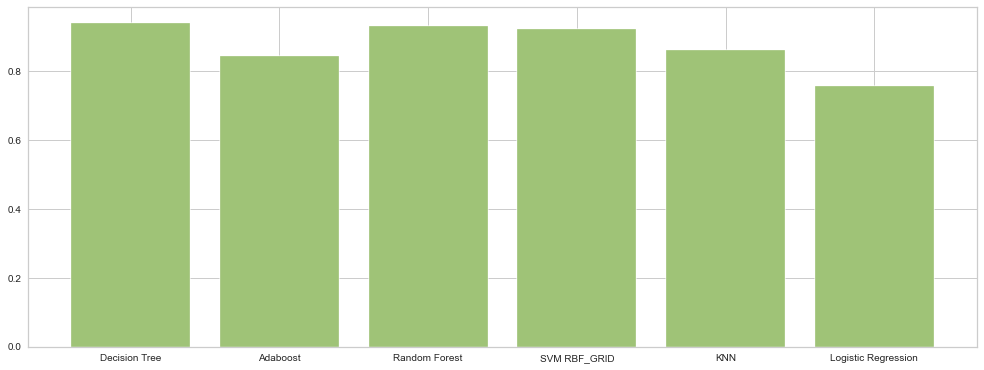

In [76]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 6.25))
for row in range(5):
    plt.bar(models["Model"],models["Score"],color='g')

## Courbe ROC

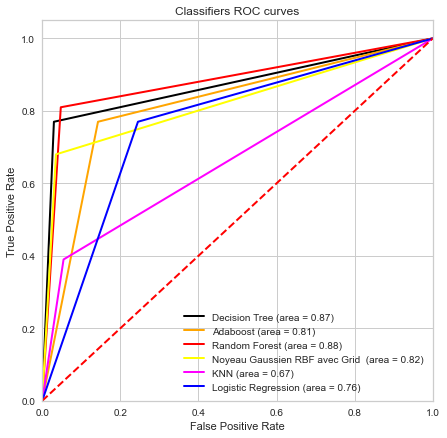

In [77]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dt) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_predboost) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_rf)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_5) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_knn) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred) 
roc_auc6 = auc(fpr6, tpr6)
plt.figure(figsize=(7,7))
plt.plot(fpr1, tpr1, color='black', lw=2, label='Decision Tree (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='orange', lw=2, label='Adaboost (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='red', lw=2, label='Random Forest (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='yellow', lw=2, label='Noyeau Gaussien RBF avec Grid  (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='magenta', lw=2, label='KNN (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='blue', lw=2, label='Logistic Regression (area = %0.2f)'% roc_auc6)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()